# RMS Measurement test

For the W51E B6 field, what RMSes are reported with different methods?

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)

In [4]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show

In [5]:
import os
os.chdir('/lustre/naasc/projects/ALMA_IMF/2017.1.01355.L/imaging_results/')

In [6]:
imgs_after_b6, cubes_after_b6 = load_images('W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_selfcal1')

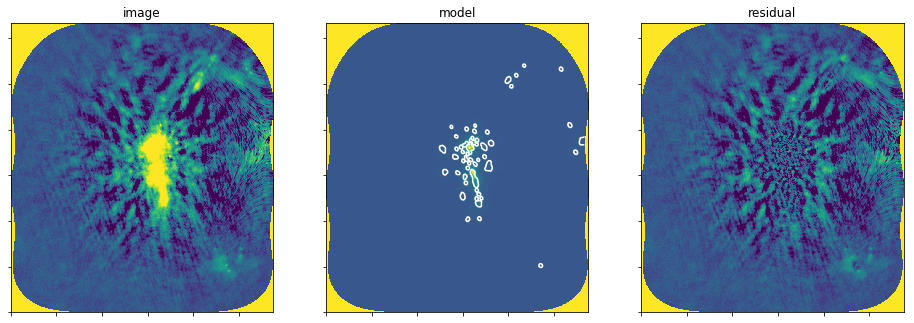

In [7]:
show(imgs_after_b6, vmin=-0.001, vmax=0.01)

In [8]:
cubes_after_b6['mask']

SpectralCube with shape=(1, 2646, 2646):
 n_x:   2646  type_x: RA---SIN  unit_x: deg    range:   290.911305 deg:  290.956845 deg
 n_y:   2646  type_y: DEC--SIN  unit_y: deg    range:    14.486177 deg:   14.530261 deg
 n_s:      1  type_s: FREQ      unit_s: Hz     range: 241986211098.448 Hz:241986211098.448 Hz

In [13]:
pb = cubes_after_b6['pb']
include_mask = pb > 0.05*pb.unit
pbim = pb.with_mask(include_mask).minimal_subcube()[0]
pb_gt_90 = pbim.value > 0.9

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


## RMS Measurements here

In [14]:
print(f"data rms pb>90: {imgs_after_b6['image'][pb_gt_90].std():0.5f}")
print(f"residual rms pb>90: {imgs_after_b6['residual'][pb_gt_90].std():0.5f}")
mod = imgs_after_b6['model']
print(f"data rms pb>90, model=0: {imgs_after_b6['residual'][pb_gt_90 & (mod == 0)].std():0.5f}")

data rms pb>90: 0.00947 Jy / beam
residual rms pb>90: 0.00083
data rms pb>90, model=0: 0.00070


The RMS of the residual is a little higher than the RMS in the unmodeled region, but they are reasonably consistent.  In this case, though, the image clearly has dramatic residuals that need to be cleaned or somehow addressed.